## EDA


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [1]:

import pandas as pd 
df_copy = pd.read_csv('google_cleaned.csv')

In [2]:
df_copy.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [4]:
df_copy[df_copy.duplicated('App')].shape

(1181, 17)

## Observation
The dataset has duplicate records

In [7]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [9]:
df_copy.shape

(9659, 17)

## Explore Data

In [10]:
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Unnamed: 0', 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

We have 8 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [12]:
## Proportion of count data on categorical columns
for col in categorical_features:
    print(df_copy[col].value_counts(normalize=True)*100)
    print('---------------------------')

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
---------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271

C:\Users\asadu\AppData\Local\Temp\ipykernel_18728\2526174130.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_copy[numeric_features[i]],shade=True, color='r')
C:\Users\asadu\AppData\Local\Temp\ipykernel_18728\2526174130.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_copy[numeric_features[i]],shade=True, color='r')
C:\Users\asadu\AppData\Local\Temp\ipykernel_18728\2526174130.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_copy[numeric_features[i]],shade=True, color='r')
C:\Users\asadu\AppData\Local\Temp\ipykernel_18728\2526174130.py:12: FutureWarning: 

`shade` is now deprecated in favor of `

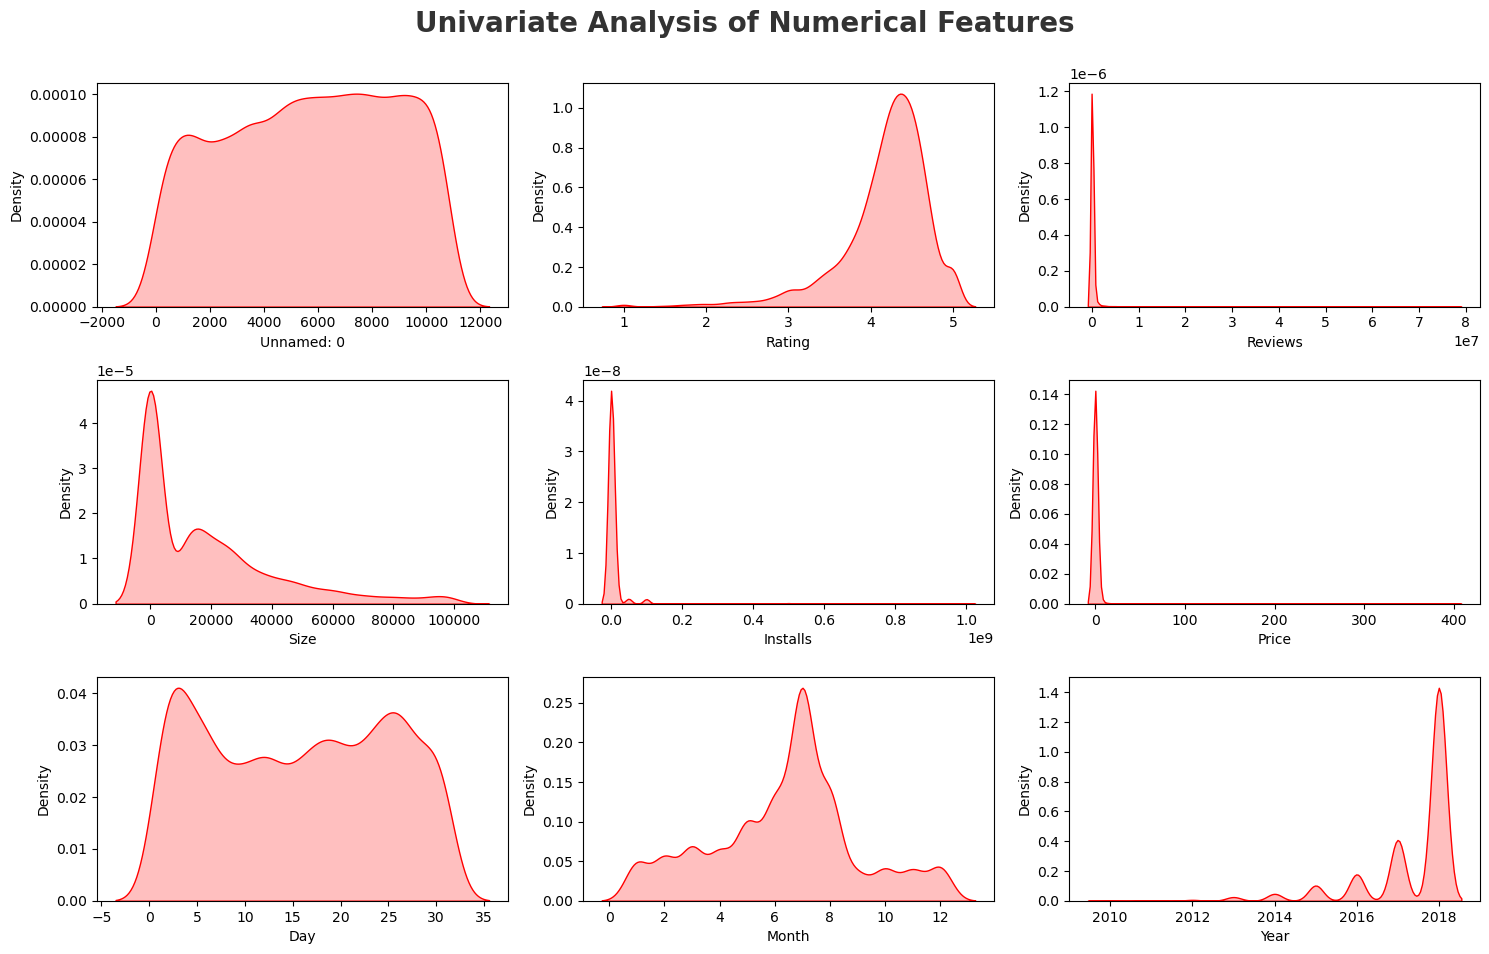

In [19]:
## Proportion of count data on numerical columns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Observations
- Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed

C:\Users\asadu\AppData\Local\Temp\ipykernel_18728\2249340082.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_copy[category[i]],palette="Set2")
C:\Users\asadu\AppData\Local\Temp\ipykernel_18728\2249340082.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_copy[category[i]],palette="Set2")


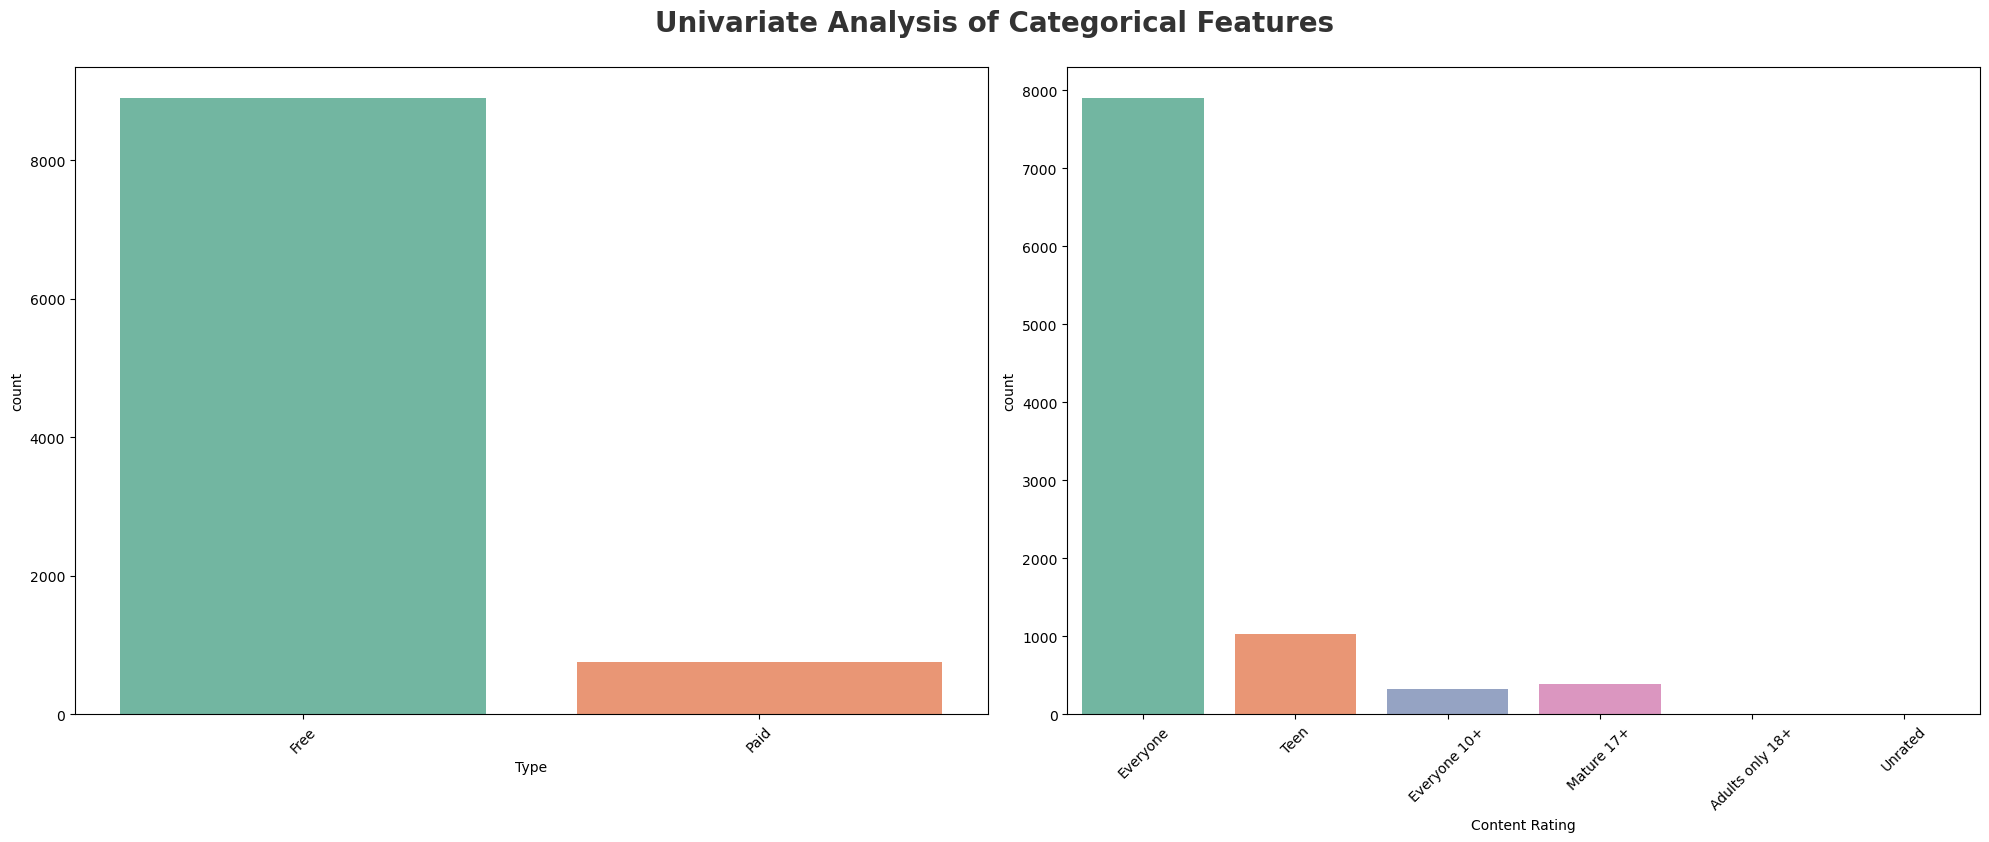

In [22]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df_copy[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

## Which is the most popular app category?

In [23]:
df_copy.head(2)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


<Axes: ylabel='count'>

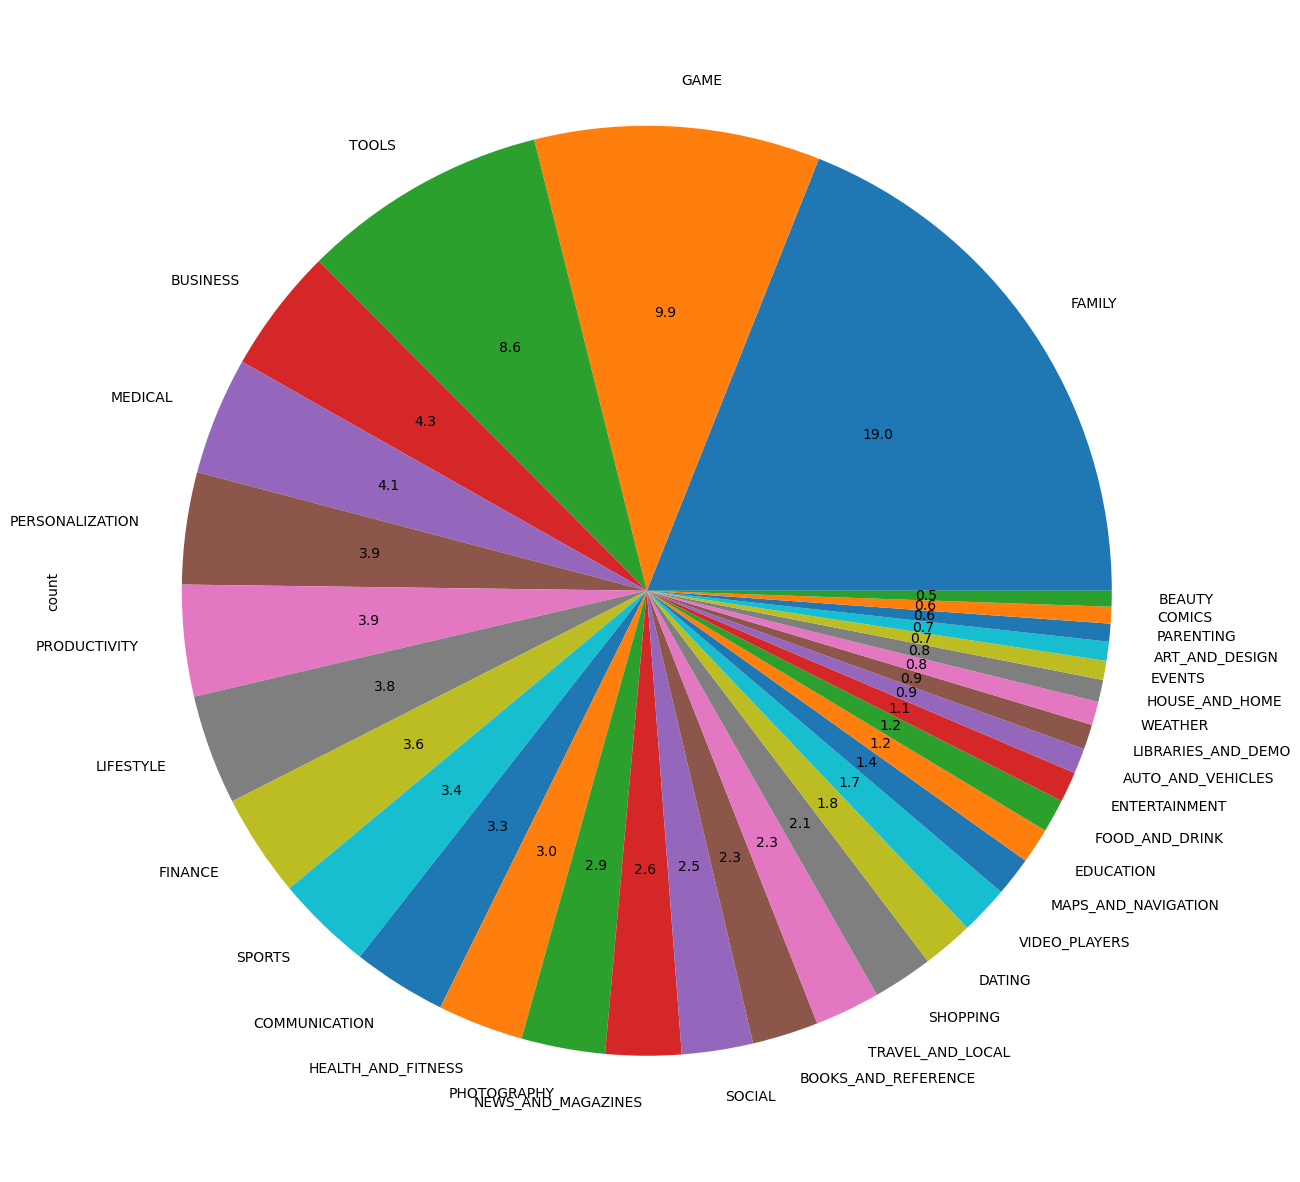

In [24]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,16),autopct='%1.1f')

## Observations

1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

In [25]:
## Top 10 App Categories
category = pd.DataFrame(df_copy['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

In [28]:
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


C:\Users\asadu\AppData\Local\Temp\ipykernel_18728\1001291768.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=category[:10], palette='hls')


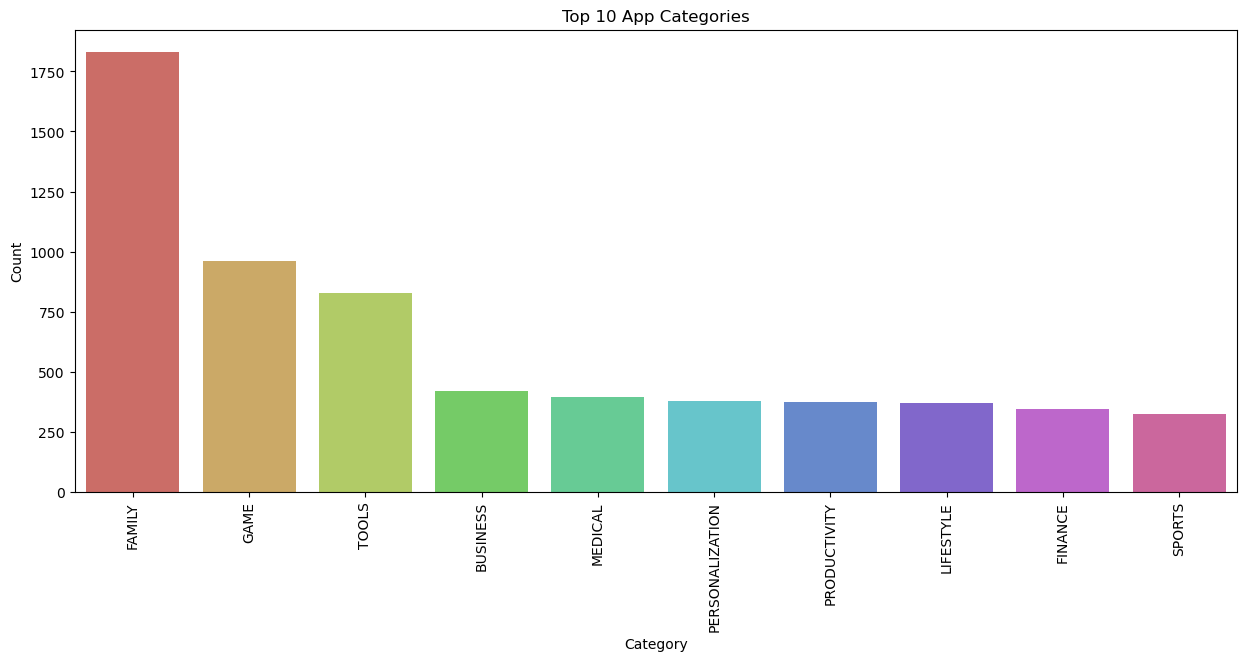

In [33]:
## top 10 app
category = df_copy['Category'].value_counts().reset_index()
category.columns = ['Category', 'Count']

plt.figure(figsize=(15,6))
sns.barplot(x='Category', y='Count', data=category[:10], palette='hls')
plt.title('Top 10 App Categories')
plt.xticks(rotation=90)
plt.show()



## Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

## Which Category has largest number of installations??

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

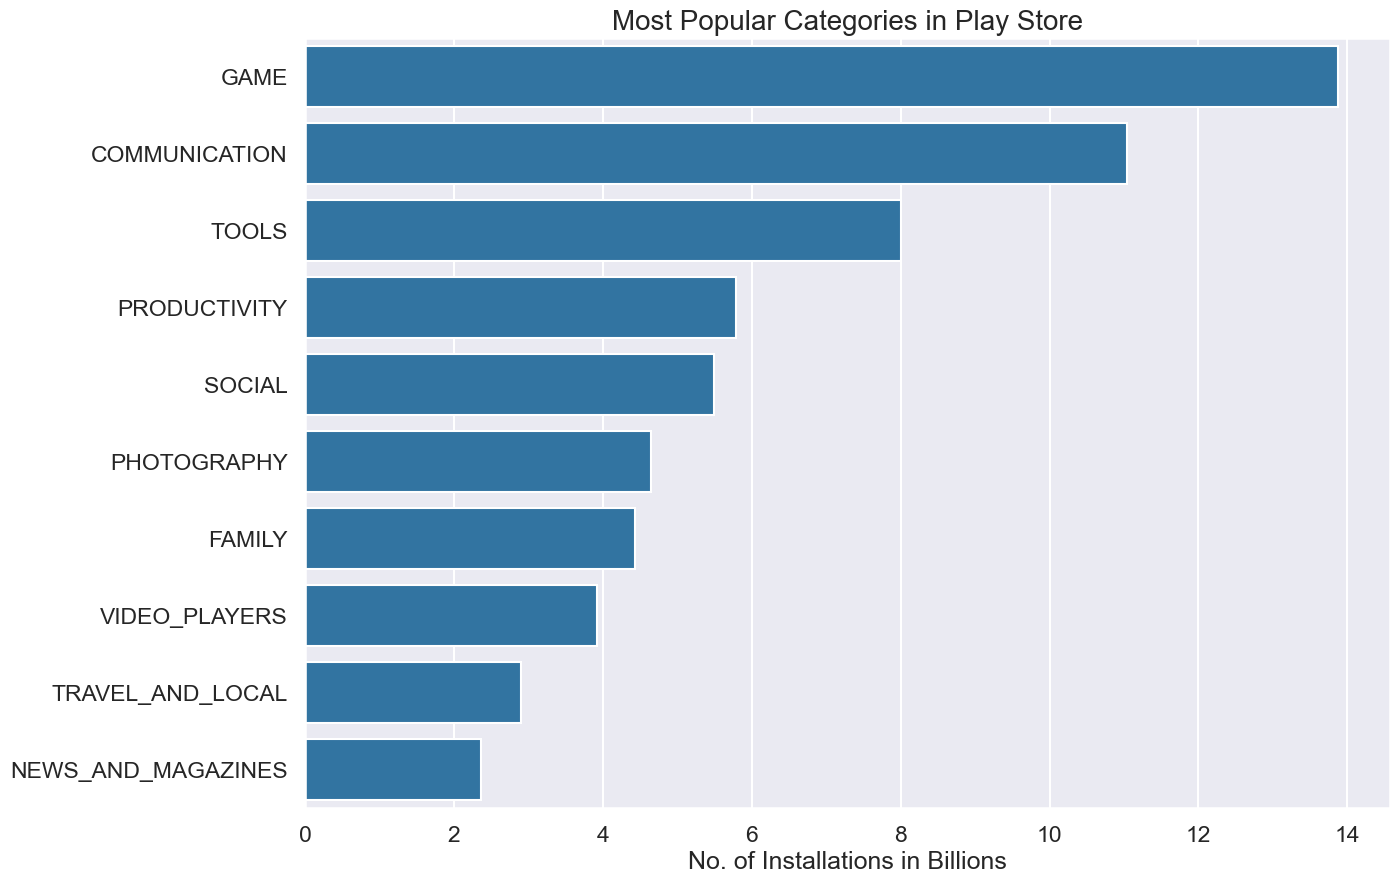

In [34]:
df_cat_installs = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

## Insights
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 35 Billion Installations GAME is the most popular Category in Google App store

## What are the Top 5 most installed Apps in Each popular Categories ??

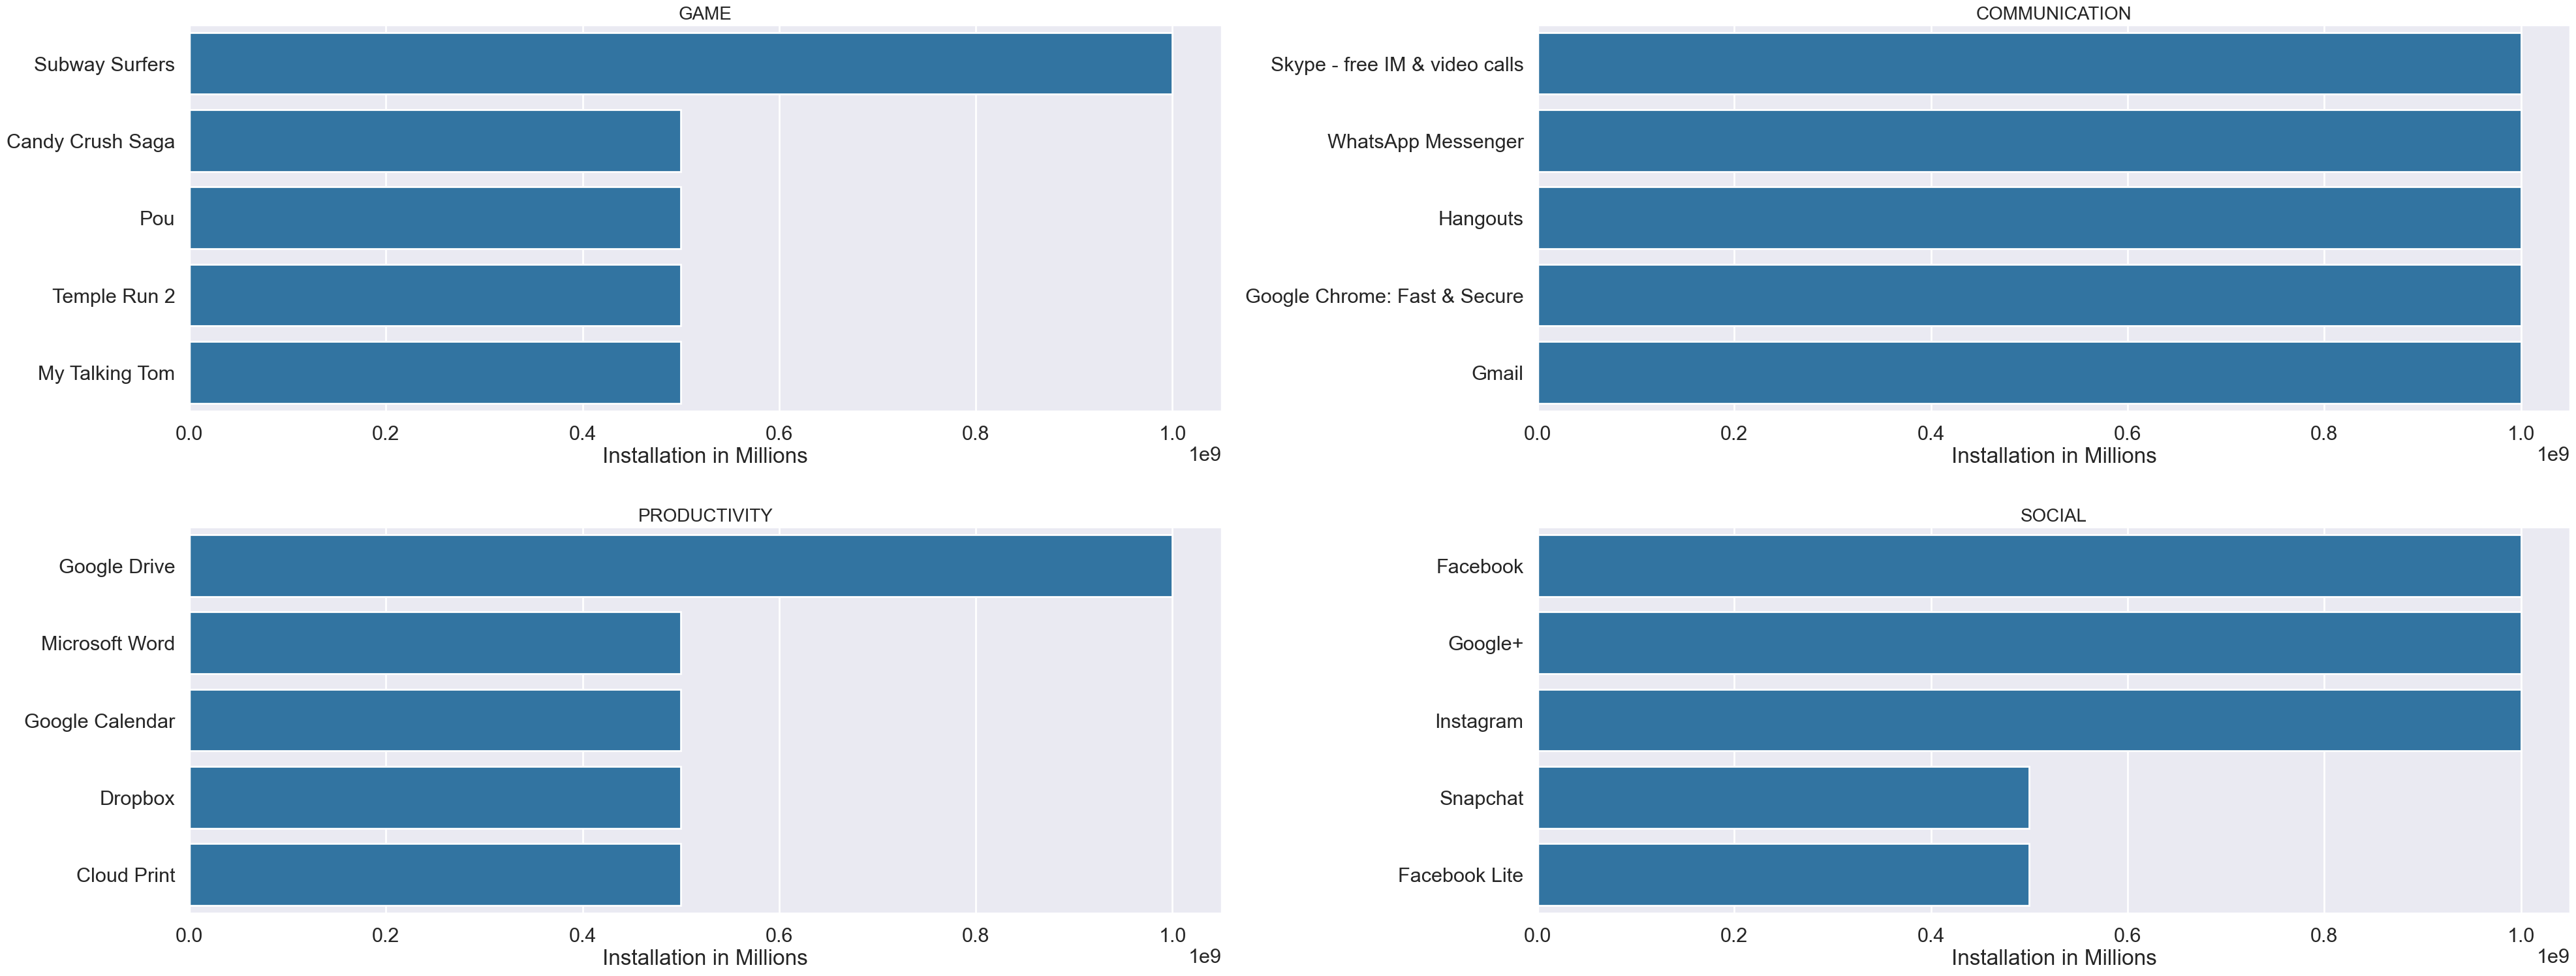

In [37]:
dfa = df_copy.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

## How many apps are there on Google Play Store which get 5 ratings??

In [39]:
rating = df_copy.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()

toprating_apps = rating[rating.Rating == 5.0]
print("Number of 5 rated apps",toprating_apps.shape[0])
toprating_apps.head(1)

Number of 5 rated apps 271


,Category,Installs,App,Rating
0,FAMILY,1000,CS & IT Interview Questions,5.0


## Result
- There are 271 five rated apps on Google Play store
- Top most is 'CT Brain Interpretation' from 'Family' Category

In [41]:
df_copy.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
